# EDA and Scikit-learn models

## Contents

[EDA and pre-processing](#eda-and-pre-processing)
* Loaded the data and visualized the distribution of the target variable (LogD)
* Trained test split data based on scaffold and visualize target variable
* Generated descriptors and visualised chemical space 

[Trained Scikit-learn models](#)
* Four different models and evaluated performance on test set

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from logd_pka_calculator.utils.project_setup import set_up
from logd_pka_calculator.visualization.visualize import (
    plot_distribution, 
    compare_train_test_distribution, 
    pca_then_tsne,
    )
from logd_pka_calculator.data.make_dataset import load_logd_data, train_test_split
from logd_pka_calculator.features.build_features import all_descriptors
from logd_pka_calculator.models.sklearn import regression_models
from config import DATA_PATH

# Set up data folder
set_up()

# Set random seed for reproducability
np.random.seed(2023)

## EDA and pre-processing

In [2]:
logd_data = load_logd_data(DATA_PATH)
logd_data.head()

[18:17:10] WARNING: not removing hydrogen atom with neighbor that has non-tetrahedral stereochemistry
[18:17:14] WARNING: not removing hydrogen atom with neighbor that has non-tetrahedral stereochemistry


Index(['Name', 'MolregNo', 'logd', 'apka', 'ROMol', 'bpka', 'SMILES',
       'Murcko_SMILES'],
      dtype='object')


,ROMol,SMILES,Murcko_SMILES,logd,apka,bpka
ID,,,,,,
Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccccc1,<rdkit.Chem.rdchem.Mol object at 0x13eb80c10>,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccccc1,O=C(c1ccccc1)c1ccc(-n2ncc(=O)[nH]c2=O)cc1,1.97,6.3299999,NaN
Cc1cc(-n2ncc(=O)[nH]c2=O)cc(Cl)c1C(=O)c1ccc(Cl)cc1,<rdkit.Chem.rdchem.Mol object at 0x13eb80cf0>,Cc1cc(-n2ncc(=O)[nH]c2=O)cc(Cl)c1C(=O)c1ccc(Cl...,O=C(c1ccccc1)c1ccc(-n2ncc(=O)[nH]c2=O)cc1,3.30,6.48,NaN
CC(=O)c1ccc(-n2ncc(=O)[nH]c2=O)cc1,<rdkit.Chem.rdchem.Mol object at 0x13eb80eb0>,CC(=O)c1ccc(-n2ncc(=O)[nH]c2=O)cc1,O=c1cnn(-c2ccccc2)c(=O)[nH]1,-0.45,6.3299999,NaN
O=c1oc2ccccc2c2cc(O)c(O)cc12,<rdkit.Chem.rdchem.Mol object at 0x13eb80f20>,O=c1oc2ccccc2c2cc(O)c(O)cc12,O=c1oc2ccccc2c2ccccc12,2.04,7.4400001,NaN
O=C(C1CCCCN1)N1CCN(Cc2ccncc2)CC1,<rdkit.Chem.rdchem.Mol object at 0x13eb80f90>,O=C(C1CCCCN1)N1CCN(Cc2ccncc2)CC1,O=C(C1CCCCN1)N1CCN(Cc2ccncc2)CC1,-1.18,NaN,8.8900003


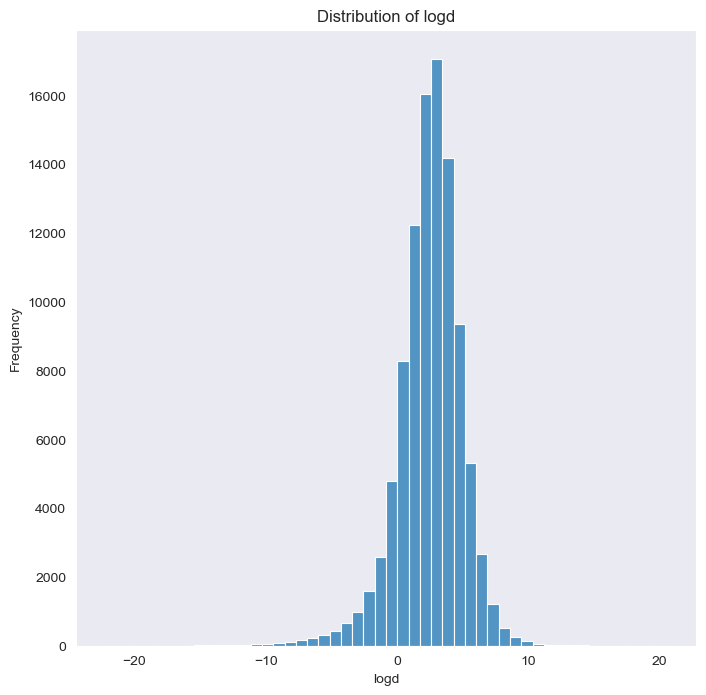

In [3]:
plot_distribution(logd_data, "logd")

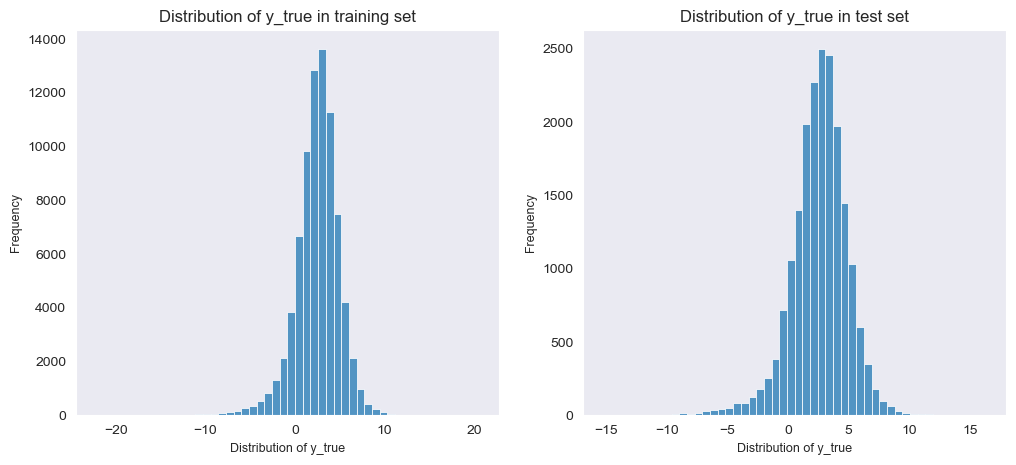

In [4]:
train, test = train_test_split(logd_data)
train.to_csv("../data/processed/train_data.csv")
test.to_csv("../data/processed/test_data.csv")
compare_train_test_distribution(train, test, "logd")

/Users/jonswain/miniforge3/envs/logd_pka_calculator/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/jonswain/miniforge3/envs/logd_pka_calculator/lib/python3.10/site-packages/molfeat/calc/descriptors.py:46: RuntimeWarning: All-NaN slice encountered
  min_charge, max_charge = np.nanmin(atomic_charges), np.nanmax(atomic_charges)
/Users/jonswain/miniforge3/envs/logd_pka_calculator/lib/python3.10/site-packages/molfeat/calc/descriptors.py:46: RuntimeWarning: All-NaN slice encountered
  min_charge, max_charge = np.nanmin(atomic_charges), np.nanmax(atomic_charges)
/Users/jonswain/miniforge3/envs/logd_pka_calculator/lib/python3.10/site-packages/molfeat/calc/descriptors.py:46: RuntimeWarning: All-NaN slice encountered
  min_charge, max_charge = np.nanmin(atomic_charges), np.nanmax(atomic_charges)
/Users

Variance in top 50 principle components: 0.797


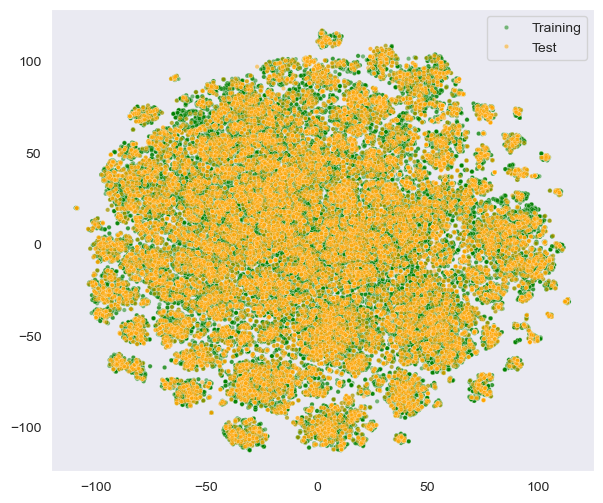

In [5]:
training_desc = all_descriptors(train)
training_desc.to_csv("../data/processed/train_desc.csv")
test_desc = all_descriptors(test)
test_desc.to_csv("../data/processed/test_desc.csv")

pca_then_tsne(
    features=[training_desc.iloc[:, -214:], test_desc.iloc[:, -214:]],
    classes=["Training", "Test"],
)

## Training models

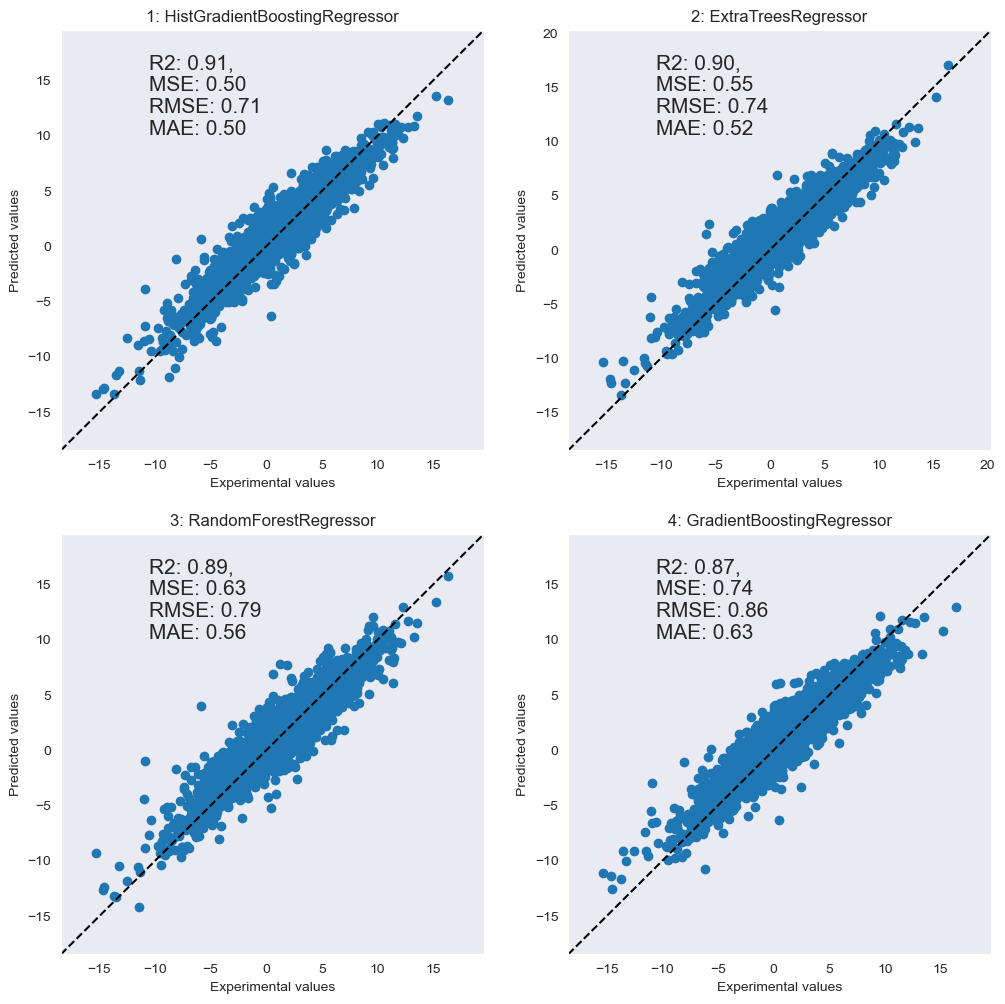

In [6]:
X_train = np.array(training_desc)
y_train = np.array(train.logd)
X_test = np.array(test_desc)
y_test = np.array(test.logd)

regression_models(X_train, y_train, X_test, y_test)